In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("Walmart.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [4]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [5]:
# Convert Date to datetime format
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)

# Extract features to make analysis easier
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         6435 non-null   int64         
 1   Date          6435 non-null   datetime64[ns]
 2   Weekly_Sales  6435 non-null   float64       
 3   Holiday_Flag  6435 non-null   int64         
 4   Temperature   6435 non-null   float64       
 5   Fuel_Price    6435 non-null   float64       
 6   CPI           6435 non-null   float64       
 7   Unemployment  6435 non-null   float64       
 8   Year          6435 non-null   int32         
 9   Month         6435 non-null   int32         
dtypes: datetime64[ns](1), float64(5), int32(2), int64(2)
memory usage: 452.6 KB


In [8]:
# 1. Store with Maximum Sales
total_sales = data.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)
print(f"Top Selling Store: {total_sales.idxmax()} with ${total_sales.max():,.2f}")

# 2. Store with highest standard deviation (Volatility)
std_sales = data.groupby('Store')['Weekly_Sales'].std().sort_values(ascending=False)
print(f"Most Volatile Store: {std_sales.idxmax()} (Std Dev: {std_sales.max():,.2f})")

Top Selling Store: 20 with $301,397,792.46
Most Volatile Store: 14 (Std Dev: 317,569.95)


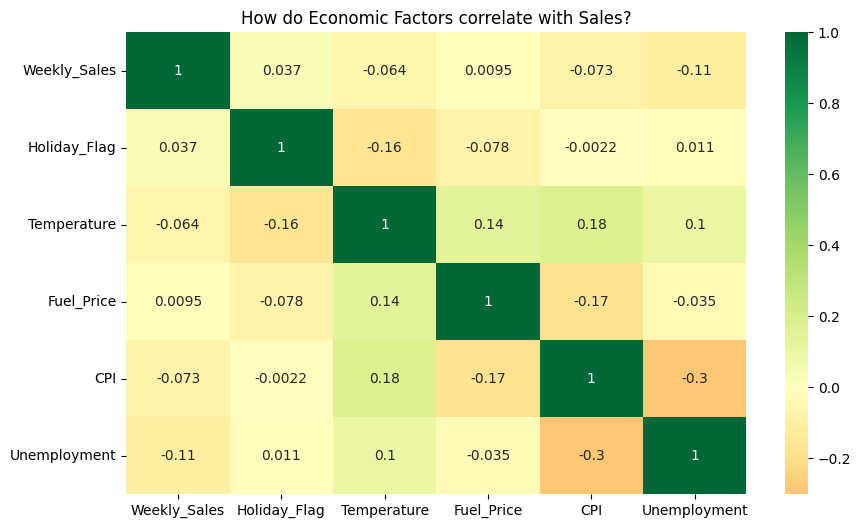

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
# We only correlate numeric columns
numeric_data = data[['Weekly_Sales', 'Holiday_Flag', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']]
sns.heatmap(numeric_data.corr(), annot=True, cmap='RdYlGn', center=0)
plt.title('How do Economic Factors correlate with Sales?')
plt.show()

In [10]:
data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Year,Month
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,2010,2
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,2010,2
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,2010,2
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,2010,2
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,2010,3


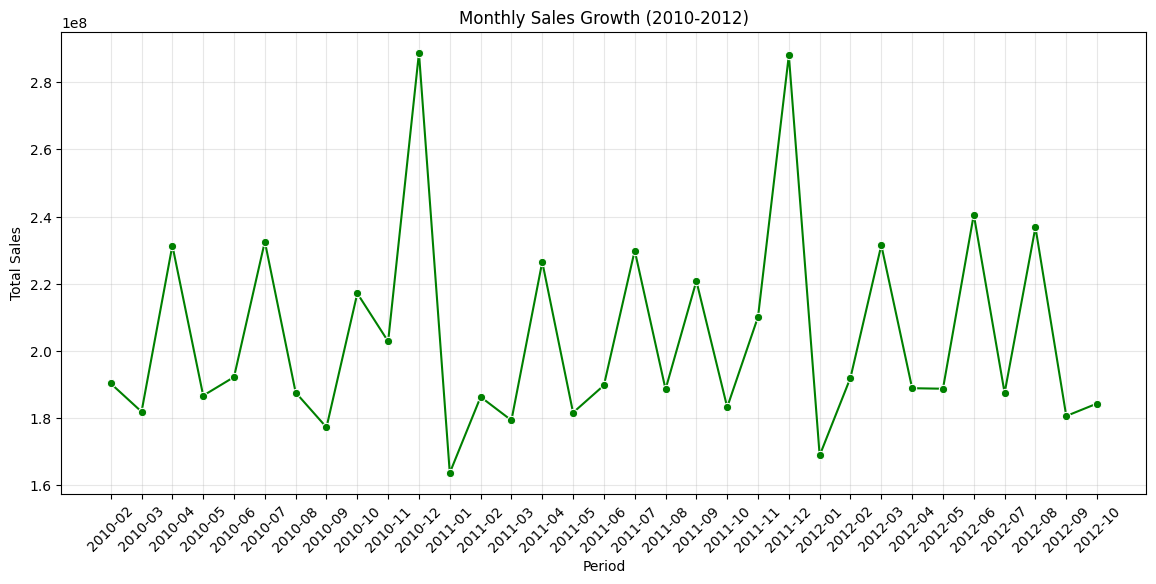

In [11]:
# Group by Year and Month to see the trend
monthly_sales = data.groupby(['Year', 'Month'])['Weekly_Sales'].sum().reset_index()

# Create a 'Period' string for labeling (e.g., "2010-02")
monthly_sales['Period'] = monthly_sales['Year'].astype(str) + '-' + monthly_sales['Month'].astype(str).str.zfill(2)

plt.figure(figsize=(14, 6))
sns.lineplot(data=monthly_sales, x='Period', y='Weekly_Sales', marker='o', color='green')
plt.xticks(rotation=45)
plt.title('Monthly Sales Growth (2010-2012)')
plt.ylabel('Total Sales')
plt.grid(True, alpha=0.3)
plt.show()

In [13]:
# 1. Remove the old ratio (optional, but keeps things clean)
if 'Economic_Pressure' in data.columns:
    data.drop(columns=['Economic_Pressure', 'Temp_Deviation'], inplace=True)

# 2. Create the "Eco_Pain_Index" (Multiplication)
# This works better because when both are high, the 'pain' for the consumer is highest.
data['Eco_Pain_Index'] = data['CPI'] * data['Unemployment']

# 3. Create a 'Cold_Weather_Effect' flag
# Your analysis showed Cold weather had the highest average sales ($1.08M).
data['Is_Cold'] = (data['Temperature'] < 45).astype(int)

# 4. Create a 'Holiday_Season' flag
# Based on your line chart peaks, Nov and Dec are the real drivers.
data['Is_Holiday_Season'] = data['Month'].isin([11, 12]).astype(int)

# 5. Re-run the correlation to see the improvement
print("New Correlations with Weekly_Sales:")
print(data[['Weekly_Sales', 'Eco_Pain_Index', 'Is_Cold', 'Is_Holiday_Season', 'Unemployment']].corr()['Weekly_Sales'])

New Correlations with Weekly_Sales:
Weekly_Sales         1.000000
Eco_Pain_Index      -0.132527
Is_Cold              0.037923
Is_Holiday_Season    0.117729
Unemployment        -0.106176
Name: Weekly_Sales, dtype: float64


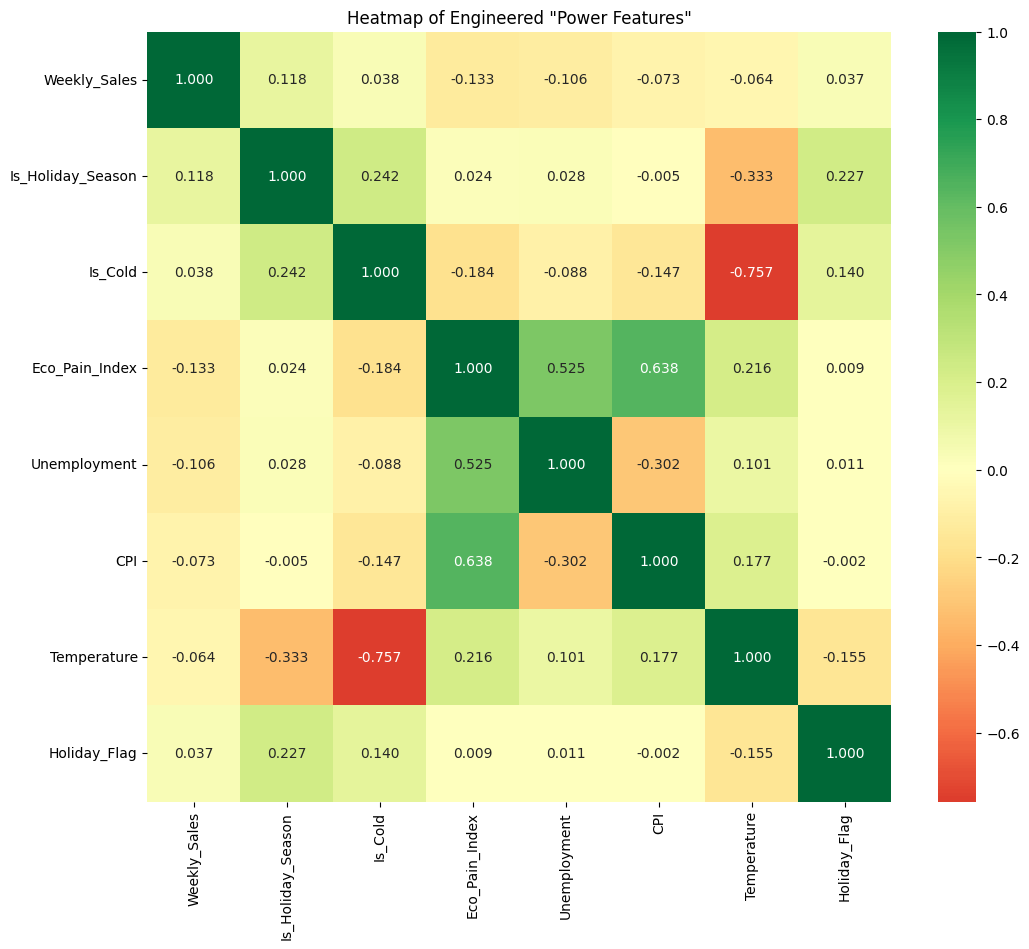

--- Correlation Leaderboard (Weekly_Sales) ---
Weekly_Sales         1.000000
Is_Holiday_Season    0.117729
Is_Cold              0.037923
Holiday_Flag         0.036891
Temperature         -0.063810
CPI                 -0.072634
Unemployment        -0.106176
Eco_Pain_Index      -0.132527
Name: Weekly_Sales, dtype: float64


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Ensure the new features are calculated (if you haven't already)
data['Eco_Pain_Index'] = data['CPI'] * data['Unemployment']
data['Is_Cold'] = (data['Temperature'] < 45).astype(int)
data['Is_Holiday_Season'] = data['Month'].isin([11, 12]).astype(int)

# 2. Select the columns for the visual
# We include the originals + your new engineered ones to compare
cols_to_plot = [
    'Weekly_Sales', 
    'Is_Holiday_Season', 
    'Is_Cold', 
    'Eco_Pain_Index', 
    'Unemployment', 
    'CPI', 
    'Temperature', 
    'Holiday_Flag'
]

# 3. Create the Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(data[cols_to_plot].corr(), annot=True, cmap='RdYlGn', center=0, fmt='.3f')
plt.title('Heatmap of Engineered "Power Features"')
plt.show()

# 4. Print the "Leaderboard" of features
print("--- Correlation Leaderboard (Weekly_Sales) ---")
print(data[cols_to_plot].corr()['Weekly_Sales'].sort_values(ascending=False))

In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# 1. Feature Selection based on your Leaderboard
# We include your 'Power Features' plus Store and Fuel_Price for completeness
features = ['Store', 'Is_Holiday_Season', 'Eco_Pain_Index', 'Is_Cold', 'Fuel_Price', 'Unemployment']

# 2. Data Preparation
# Convert Store to string so it's treated as a category for One-Hot Encoding
data['Store'] = data['Store'].astype(str)

# One-Hot Encode the Stores (This creates 45 dummy columns)
# This allows the model to learn the baseline sales for EACH specific store
X = pd.get_dummies(data[features], columns=['Store'], drop_first=True, dtype=int)
y = data['Weekly_Sales']

# 3. Train/Test Split
# We use 20% of the data to test how well the model predicts "unseen" weeks
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Initialize and Train the Random Forest Regressor
# Random Forest is much better at handling outliers and non-linear relationships
# than simple Linear Regression.
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# 5. Model Evaluation
predictions = rf_model.predict(X_test)
r2 = r2_score(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)

print(f"--- Final Model Performance ---")
print(f"R-squared Score: {r2:.4f}")
print(f"Average Error per Week: ${mae:,.2f}")

# 6. Feature Importance Check
importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\n--- Top 5 Most Influential Features ---")
print(importances.head(5))

--- Final Model Performance ---
R-squared Score: 0.9223
Average Error per Week: $80,064.38

--- Top 5 Most Influential Features ---
     Feature  Importance
16  Store_20    0.084231
37   Store_4    0.083016
8   Store_13    0.078317
9   Store_14    0.074094
15   Store_2    0.066021


In [21]:
import joblib

# Save the model to a file
joblib.dump(rf_model, 'walmart_sales_model_v1.pkl')

# Save the column names to ensure future data matches exactly
model_columns = list(X.columns)
joblib.dump(model_columns, 'model_columns.pkl')

print("Model and Columns saved safely!")

Model and Columns saved safely!


--- V2 Model Performance ---
R2 Score: 0.9365
Mean Absolute Error: $78,346.37


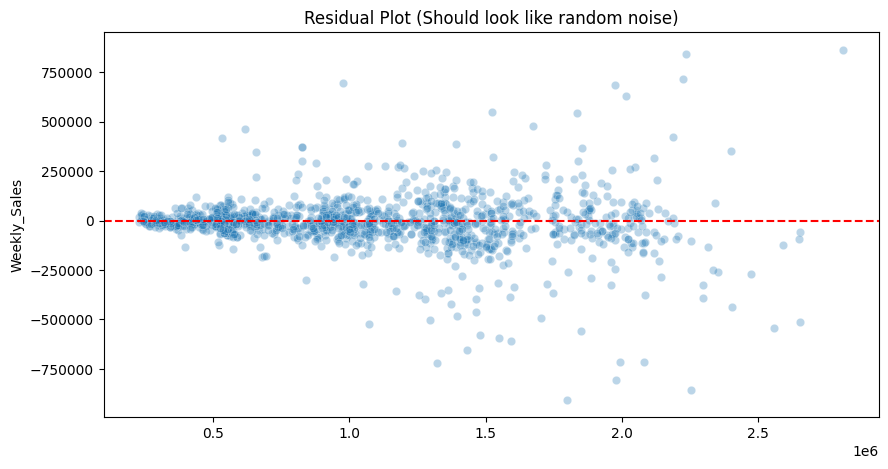

Model and Feature List saved safely as V2.


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
import joblib

# --- 1. PREPARATION & TIME-SERIES REFINEMENT ---
# Sort by store and date to ensure time-based features calculate correctly
data = data.sort_values(by=['Store', 'Date'])

# A. Lagged Sales: What happened last week?
data['Last_Week_Sales'] = data.groupby('Store')['Weekly_Sales'].shift(1)

# B. Fuel Price Change: Is there a sudden price shock?
data['Fuel_Price_Change'] = data.groupby('Store')['Fuel_Price'].diff()

# C. Handling NaNs: The first week of data won't have a 'previous' week
data['Last_Week_Sales'] = data['Last_Week_Sales'].fillna(data['Weekly_Sales'].mean())
data['Fuel_Price_Change'] = data['Fuel_Price_Change'].fillna(0)

# --- 2. FEATURE ENGINEERING ---
# D. Eco Pain Index (Multiplication interaction)
data['Eco_Pain_Index'] = data['CPI'] * data['Unemployment']

# E. Seasonal & Weather Flags
data['Is_Holiday_Season'] = data['Month'].isin([11, 12]).astype(int)
data['Is_Cold'] = (data['Temperature'] < 45).astype(int)

# --- 3. DATASET PREPARATION ---
# Select our optimized feature set
features = [
    'Store', 'Is_Holiday_Season', 'Eco_Pain_Index', 'Is_Cold', 
    'Last_Week_Sales', 'Fuel_Price_Change', 'Unemployment', 'CPI'
]

# One-Hot Encode Store IDs (making them 1s and 0s)
data['Store'] = data['Store'].astype(str)
X = pd.get_dummies(data[features], columns=['Store'], drop_first=True, dtype=int)
y = data['Weekly_Sales']

# Split the data (80% Train, 20% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- 4. MODEL TRAINING & VALIDATION ---
# Using Random Forest to handle the non-linear "Temperature vs Store" interactions
rf_v2 = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
rf_v2.fit(X_train, y_train)

# Predictions
predictions = rf_v2.predict(X_test)

# Evaluation
print(f"--- V2 Model Performance ---")
print(f"R2 Score: {r2_score(y_test, predictions):.4f}")
print(f"Mean Absolute Error: ${mean_absolute_error(y_test, predictions):,.2f}")

# --- 5. RESIDUAL ANALYSIS ---
residuals = y_test - predictions
plt.figure(figsize=(10, 5))
sns.scatterplot(x=predictions, y=residuals, alpha=0.3)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot (Should look like random noise)')
plt.show()

# --- 6. FREEZING THE WORK ---
joblib.dump(rf_v2, 'walmart_model_final_v2.pkl')
joblib.dump(X.columns.tolist(), 'final_feature_list.pkl')
print("Model and Feature List saved safely as V2.")

In [23]:
# Create a DataFrame for Test Results
test_results = X_test.copy()
test_results['Actual_Sales'] = y_test
test_results['Predicted_Sales'] = predictions
test_results['Abs_Error'] = abs(test_results['Actual_Sales'] - test_results['Predicted_Sales'])

# Merging back with the original data to get the Dates
test_results = test_results.join(data['Date'])

# Find the Top 10 weeks with the highest errors
top_errors = test_results.sort_values(by='Abs_Error', ascending=False).head(10)
print("--- Top 10 Dates with Highest Prediction Errors ---")
print(top_errors[['Date', 'Actual_Sales', 'Predicted_Sales', 'Abs_Error']])

--- Top 10 Dates with Highest Prediction Errors ---
           Date  Actual_Sales  Predicted_Sales    Abs_Error
1620 2010-12-31     891736.91     1.797466e+06  905729.0189
527  2011-12-23    3676388.98     2.811701e+06  864688.3393
1525 2011-12-02    1399322.44     2.254368e+06  855045.7341
3764 2010-12-24    3078162.08     2.234529e+06  843632.8843
1477 2010-12-31    1172003.10     1.978932e+06  806928.7637
2101 2011-12-30     603460.79     1.322822e+06  719361.1547
1329 2010-11-26    2939946.38     2.222693e+06  717253.0365
2621 2010-12-31    1275146.94     1.990925e+06  715777.8841
3956 2011-12-02    1368130.35     2.081929e+06  713798.2591
3861 2010-02-05    1672352.29     9.751554e+05  697196.8870


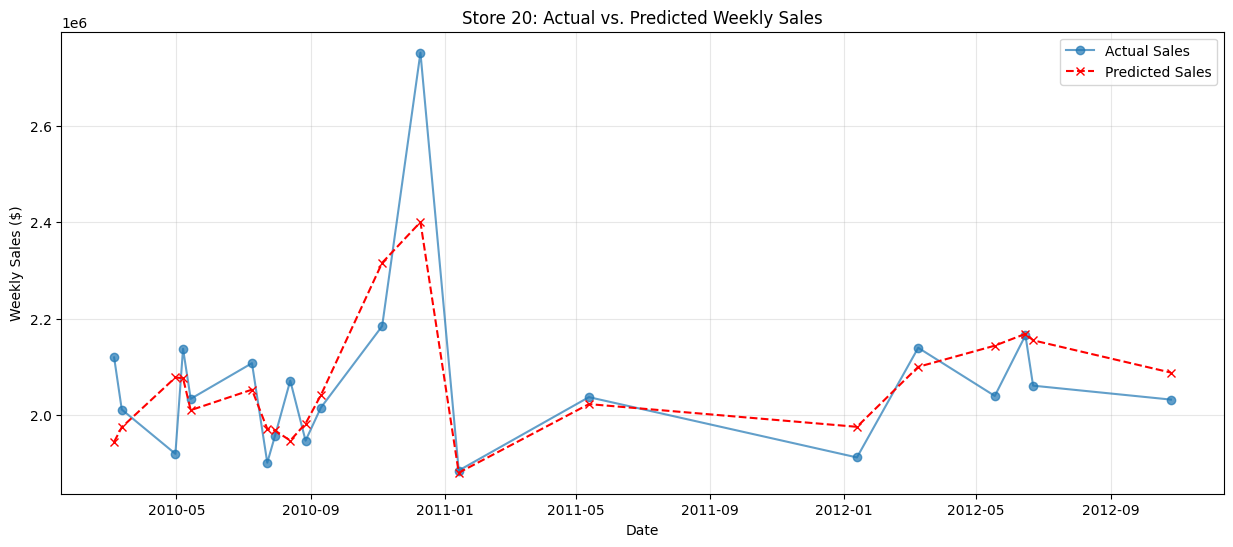

In [24]:
# Select a store to visualize (e.g., Store 20, which was highly influential)
target_store = '20'

# Filter the test results for this store
# Note: Since we used One-Hot Encoding, we check the dummy column
store_col = f'Store_{target_store}'
store_data = test_results[test_results[store_col] == 1].sort_values(by='Date')

plt.figure(figsize=(15, 6))
plt.plot(store_data['Date'], store_data['Actual_Sales'], label='Actual Sales', marker='o', alpha=0.7)
plt.plot(store_data['Date'], store_data['Predicted_Sales'], label='Predicted Sales', marker='x', linestyle='--', color='red')
plt.title(f'Store {target_store}: Actual vs. Predicted Weekly Sales')
plt.xlabel('Date')
plt.ylabel('Weekly Sales ($)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [25]:
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# 1. Generate predictions for both sets to check for overfitting
pred_train = rf_v2.predict(X_train)
pred_test = rf_v2.predict(X_test)

# 2. Calculate R2-Scores
r2_train_rf = r2_score(y_train, pred_train)
r2_test_rf = r2_score(y_test, pred_test)

# 3. Calculate Error Metrics
mse_rf = mean_squared_error(y_test, pred_test)
rmse_rf = np.sqrt(mse_rf)
mae_rf = mean_absolute_error(y_test, pred_test)

# 4. Display the results
print(f"--- Your Model Performance Values ---")
print(f"R2-Score TrainSet: {r2_train_rf:.4f}")
print(f"R2-Score TestSet:  {r2_test_rf:.4f}")
print(f"MSE:               {mse_rf:,.2f}")
print(f"RMSE:              {rmse_rf:,.2f}")
print(f"MAE:               {mae_rf:,.2f}")

--- Your Model Performance Values ---
R2-Score TrainSet: 0.9892
R2-Score TestSet:  0.9365
MSE:               18,749,899,275.96
RMSE:              136,930.27
MAE:               78,346.37


In [28]:
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

# Test XGBoost
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)
print(f"XGBoost Test R2: {r2_score(y_test, xgb.predict(X_test)):.4f}")

# Test CatBoost
cat = CatBoostRegressor(iterations=100, learning_rate=0.1, verbose=0)
cat.fit(X_train, y_train)
print(f"CatBoost Test R2: {r2_score(y_test, cat.predict(X_test)):.4f}")

XGBoost Test R2: 0.9320
CatBoost Test R2: 0.9343


In [29]:
# Tuned CatBoost - Giving it more time to learn (1000 iterations)
cat_tuned = CatBoostRegressor(
    iterations=1000, 
    learning_rate=0.05, 
    depth=8, 
    l2_leaf_reg=3,
    loss_function='MAE', # Tell it to focus on lowering that $78k error specifically
    verbose=0, 
    random_state=42
)

cat_tuned.fit(X_train, y_train)
new_r2 = r2_score(y_test, cat_tuned.predict(X_test))
new_mae = mean_absolute_error(y_test, cat_tuned.predict(X_test))

print(f"--- Tuned CatBoost Performance ---")
print(f"New R2 Score: {new_r2:.4f}")
print(f"New MAE: ${new_mae:,.2f}")

--- Tuned CatBoost Performance ---
New R2 Score: 0.9398
New MAE: $71,495.83


In [30]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Define the models to test
model_list = {
    "LinearRegression": LinearRegression(),
    "KNNRegression": KNeighborsRegressor(),
    "RandomForestRegression": RandomForestRegressor(n_estimators=100, random_state=42),
    "GradientBoostingRegression": GradientBoostingRegressor(random_state=42),
    "XGBoostRegression": XGBRegressor(n_estimators=100, random_state=42),
    "CatBoostRegression": CatBoostRegressor(iterations=1000, learning_rate=0.05, verbose=0, random_state=42)
}

# Container for results
comparison_data = []

for name, model in model_list.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on test set
    preds = model.predict(X_test)
    
    # Calculate metrics
    r2 = r2_score(y_test, preds)
    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, preds)
    
    comparison_data.append({
        "Model": name,
        "R2-Score": r2,
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae
    })

# Create the final table
comparison_df = pd.DataFrame(comparison_data).sort_values(by="R2-Score", ascending=False)
print(comparison_df)

                        Model  R2-Score           MSE           RMSE  \
5          CatBoostRegression  0.945180  1.619658e+10  127265.796792   
0            LinearRegression  0.941808  1.719286e+10  131121.552164   
2      RandomForestRegression  0.936538  1.874990e+10  136930.271584   
3  GradientBoostingRegression  0.936331  1.881114e+10  137153.701462   
4           XGBoostRegression  0.933550  1.963266e+10  140116.600268   
1               KNNRegression  0.911638  2.610657e+10  161575.262387   

            MAE  
5  72474.220209  
0  80405.908355  
2  78346.371101  
3  78770.980232  
4  76731.867997  
1  95120.114908  


C:\Users\Sunil\AppData\Local\Temp\ipykernel_31916\809987466.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=fi_df, palette='viridis')


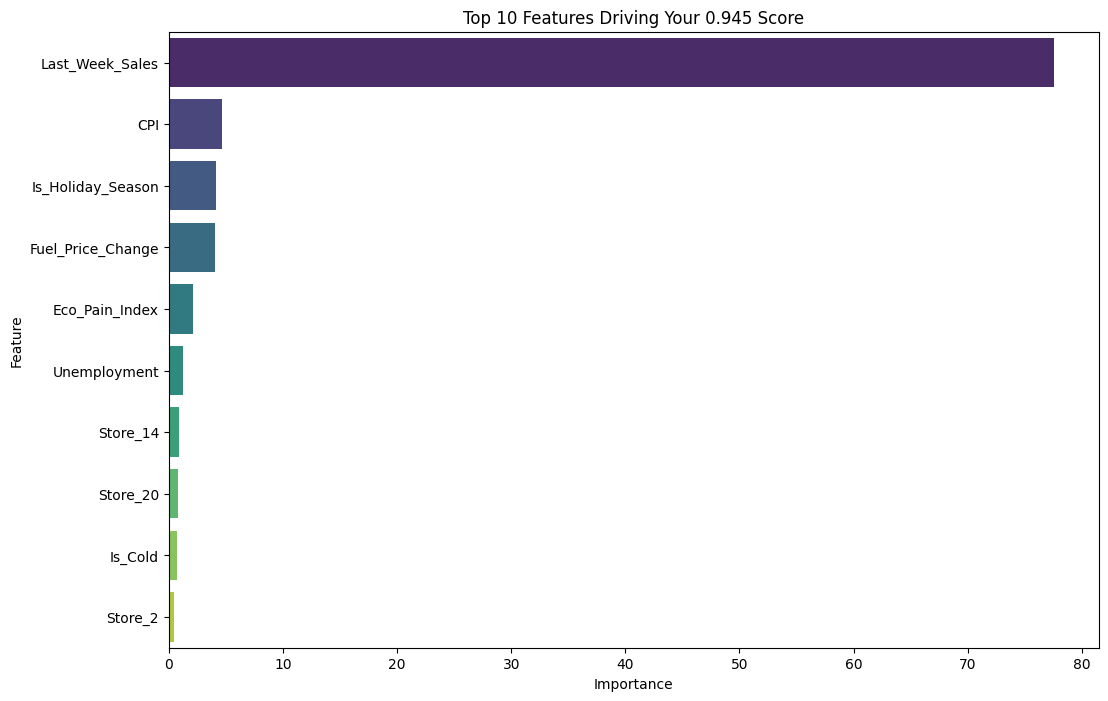

In [31]:
import matplotlib.pyplot as plt

# Get feature importance from your champion CatBoost model
feature_importance = model_list["CatBoostRegression"].get_feature_importance()
feature_names = X_train.columns

# Create a DataFrame for visualization
fi_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
fi_df = fi_df.sort_values(by='Importance', ascending=False).head(10) # Top 10

# Plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=fi_df, palette='viridis')
plt.title('Top 10 Features Driving Your 0.945 Score')
plt.show()

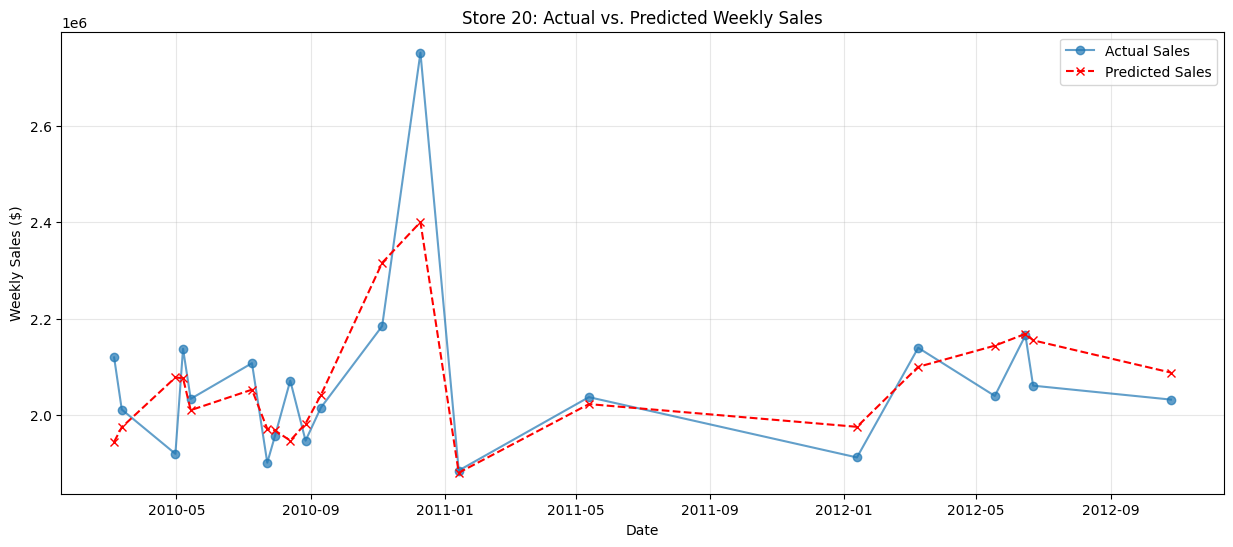

In [32]:
# Select a store to visualize (e.g., Store 20, which was highly influential)
target_store = '20'

# Filter the test results for this store
# Note: Since we used One-Hot Encoding, we check the dummy column
store_col = f'Store_{target_store}'
store_data = test_results[test_results[store_col] == 1].sort_values(by='Date')

plt.figure(figsize=(15, 6))
plt.plot(store_data['Date'], store_data['Actual_Sales'], label='Actual Sales', marker='o', alpha=0.7)
plt.plot(store_data['Date'], store_data['Predicted_Sales'], label='Predicted Sales', marker='x', linestyle='--', color='red')
plt.title(f'Store {target_store}: Actual vs. Predicted Weekly Sales')
plt.xlabel('Date')
plt.ylabel('Weekly Sales ($)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()